# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

In [2]:
# Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

In [3]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [4]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [5]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

El dataset CIFAR-10 contiene 60,000 imágenes RGB de 32×32 píxeles divididas en 10 clases balanceadas, incluyendo animales y vehículos. Se ha dividido en:

- 40,000 imágenes para entrenamiento

- 10,000 para validación

- 10,000 para test

Las imágenes fueron normalizadas (valores de píxeles en [0, 1]) y las etiquetas se codificaron en formato one-hot para clasificación multiclase.

Se visualizaron ejemplos iniciales por clase para observar la diversidad visual (variaciones de color, fondo, perspectiva):

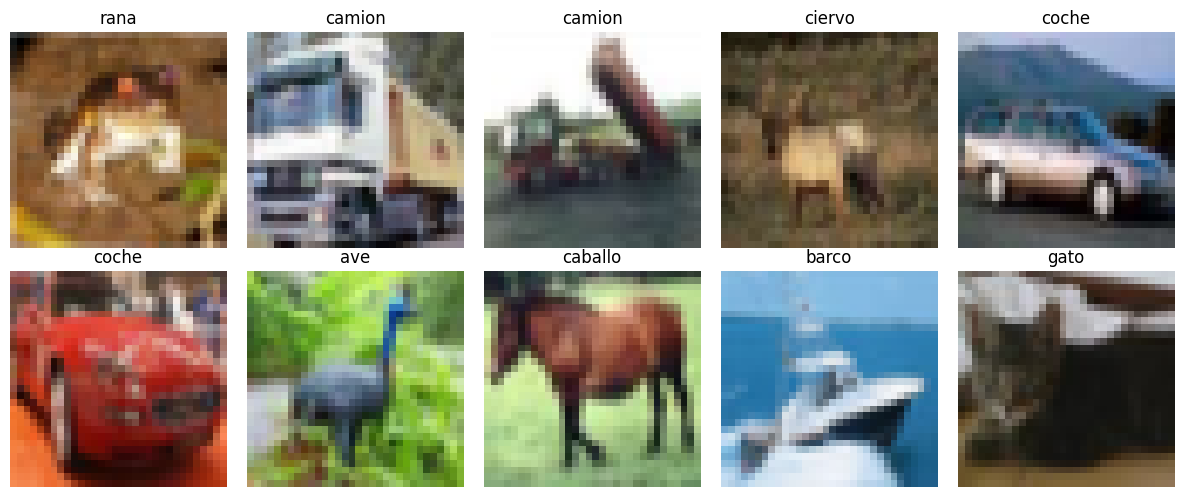

In [6]:
# Visualizar algunas imágenes del dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(list(MAP_ELEMENTS.values())[y_train[i][0]])
    ax.axis('off')
plt.tight_layout()
plt.show()


# Modelo 1: Fully Connected (FC)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten



Modelo 1: Fully Connected (FC)

Este modelo sirve como una línea base. Se utilizó una arquitectura completamente densa, sin capas convolucionales:

In [13]:
fc_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])



Hiperparámetros utilizados

- optimizer='adam':
Se utiliza el optimizador Adam (Adaptive Moment Estimation), uno de los más usados.

- loss='categorical_crossentropy':
Esta es la función de pérdida más común para clasificación multiclase con etiquetas one-hot. Calcula la distancia entre la distribución predicha (salida de softmax) y la real (vector one-hot). Penaliza más fuertemente las predicciones erróneas con alta confianza.

- metrics=['accuracy']:
Se evalúa el rendimiento del modelo usando la precisión (accuracy), es decir, el porcentaje de predicciones correctas sobre el total.

In [14]:
fc_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


Expliquemos los siguientes hiperparámetros:

- epochs=20:
El número de veces que el modelo verá el conjunto completo de entrenamiento. En este caso se entrena durante 20 ciclos completos. Un número para evitar sobreajuste y observar la evolución del modelo.

- batch_size=64:
El modelo ajusta sus pesos cada vez que procesa 64 imágenes. Este tamaño de lote es un equilibrio común entre eficiencia computacional y estabilidad del gradiente.

In [15]:
fc_history = fc_model.fit(x_train, y_train_one_hot,
                          validation_data=(x_valid, y_valid_one_hot),
                          epochs=20,
                          batch_size=64)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.2629 - loss: 2.2553 - val_accuracy: 0.3658 - val_loss: 1.7822
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.3794 - loss: 1.7419 - val_accuracy: 0.3834 - val_loss: 1.7660
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4090 - loss: 1.6643 - val_accuracy: 0.4195 - val_loss: 1.6524
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4284 - loss: 1.6048 - val_accuracy: 0.3831 - val_loss: 1.7222
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4407 - loss: 1.5833 - val_accuracy: 0.4385 - val_loss: 1.5839
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4594 - loss: 1.5331 - val_accuracy: 0.4212 - val_loss: 1.6470
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4608 - loss: 1.5199 - val_accuracy: 0.4433 - val_loss: 1.5748
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4696 - loss: 1.5015 - 

Evaluemos ahora el modelo

In [20]:
import matplotlib.pyplot as plt



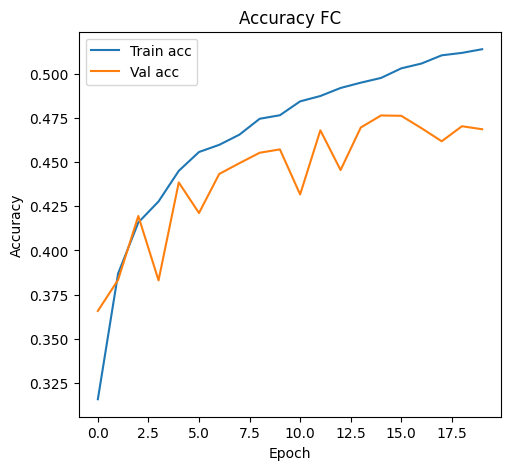

In [21]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(fc_history.history['accuracy'], label='Train acc')
plt.plot(fc_history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy FC')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()





El gráfico anterior muestra la evolución de la precisión (accuracy) en entrenamiento y validación durante las 20 épocas:

- La precisión en entrenamiento mejora constantemente hasta superar el 50%.

- La precisión en validación es más inestable y se estanca alrededor del 47%, lo cual indica que el modelo tiene poca capacidad de generalización.

Esta divergencia creciente entre Train acc y Val acc sugiere un posible inicio de sobreajuste (overfitting), aunque leve.

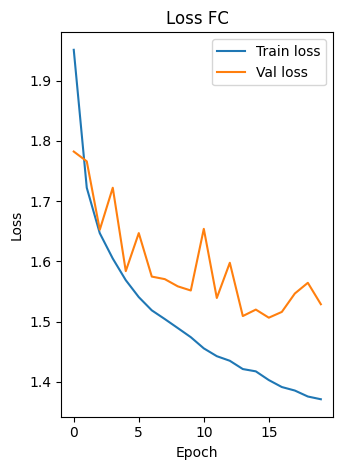

In [22]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(fc_history.history['loss'], label='Train loss')
plt.plot(fc_history.history['val_loss'], label='Val loss')
plt.title('Loss FC')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

La función de pérdida (categorical_crossentropy) disminuye consistentemente en entrenamiento.

Sin embargo, la pérdida de validación no baja al mismo ritmo y fluctúa más, lo que refuerza la sospecha de sobreajuste. El modelo aprende a clasificar el conjunto de entrenamiento, pero no logra generalizar igual de bien a datos nuevos.

In [23]:
# Evaluar en test
fc_test_loss, fc_test_acc = fc_model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Test accuracy (FC): {fc_test_acc:.4f}")
print(f"Test loss (FC): {fc_test_loss:.4f}")

# Predicciones
fc_y_pred = fc_model.predict(x_test)
fc_y_pred_classes = np.argmax(fc_y_pred, axis=1)
fc_y_true_classes = np.argmax(y_test_one_hot, axis=1)

Test accuracy (FC): 0.4697
Test loss (FC): 1.5128
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

In [26]:
print("Reporte FC:")
print(classification_report(fc_y_true_classes, fc_y_pred_classes, target_names=MAP_ELEMENTS.values()))


Reporte FC:
              precision    recall  f1-score   support

       avion       0.57      0.49      0.53      1000
       coche       0.64      0.55      0.59      1000
         ave       0.34      0.37      0.36      1000
        gato       0.34      0.36      0.35      1000
      ciervo       0.34      0.58      0.43      1000
       perro       0.40      0.35      0.38      1000
        rana       0.59      0.38      0.46      1000
     caballo       0.53      0.53      0.53      1000
       barco       0.53      0.67      0.59      1000
      camion       0.64      0.41      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000



El classification_report muestra el detalle por clase:

Mejores resultados: coche, camión, barco, rana

Peores resultados: gato, ave, caballo, perro

El promedio general (macro avg) es:

- Precisión: 0.49

- Recall: 0.47

- F1-score: 0.47

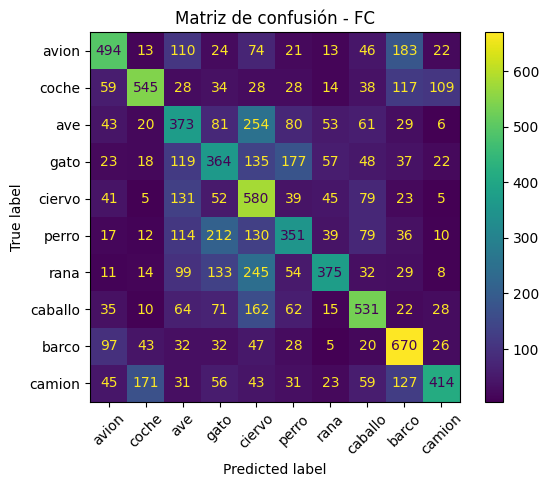

In [27]:
# Matriz de confusión
cm_fc = confusion_matrix(fc_y_true_classes, fc_y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_fc, display_labels=MAP_ELEMENTS.values())
disp.plot(xticks_rotation=45)
plt.title("Matriz de confusión - FC")
plt.show()

La matriz de confusión permite observar qué clases se confunden con más frecuencia. Algunos ejemplos claros son:

- Muchos gatos fueron clasificados como perros, caballos o ciervos.

- Aves confundidas con gatos y ranas.

- Coches confundidos con camiones y barcos.

Esto indica que, al no usar convoluciones, el modelo no es capaz de aprender patrones espaciales como bordes o formas, lo que resulta en confusiones sistemáticas entre clases con morfologías similares.

# Modelo 2: CNN

En esta segunda versión del modelo, se introduce una red neuronal convolucional, que permite extraer patrones espaciales de las imágenes como bordes, texturas o formas. Esta arquitectura mejora significativamente la capacidad del modelo para clasificar imágenes en comparación con el modelo Fully Connected.

In [30]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout
from keras.optimizers import Adam



In [32]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularización para evitar overfitting
    Dense(10, activation='softmax')  # 10 clases del CIFAR-10
])



In [33]:
# Compilación del modelo
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Vamos a explicar los parámetros:

- Conv2D: Las capas convolucionales aplican filtros (también denominados kernels) para extraer características espaciales locales de las imágenes, como bordes, texturas o esquinas. En este caso, se han utilizado dos bloques con 32 y 64 filtros respectivamente, cada uno con un tamaño de 3×3.

- padding='same': Este parámetro asegura que la salida de cada capa convolucional mantenga las mismas dimensiones espaciales que la entrada, facilitando la construcción de arquitecturas más profundas sin pérdida de resolución temprana.

- MaxPooling2D: Las capas de pooling aplican una operación de muestreo (habitualmente max pooling) que reduce la dimensionalidad espacial de las representaciones, conservando las características más relevantes y disminuyendo el coste computacional y el riesgo de sobreajuste.

- Flatten: Esta capa transforma la salida tridimensional de las capas convolucionales en un vector unidimensional, permitiendo su uso como entrada en las capas densas (fully connected).

- Dense(128): Capa completamente conectada compuesta por 128 neuronas con activación ReLU. Actúa como un clasificador no lineal sobre las características previamente extraídas por las capas convolucionales.

- Dropout(0.5): Técnica de regularización que consiste en desactivar aleatoriamente el 50% de las neuronas durante el entrenamiento. Esto previene el sobreajuste y mejora la capacidad de generalización del modelo.

- Dense(10, activation='softmax'): Capa de salida con 10 neuronas (una por cada clase del conjunto CIFAR-10), y activación softmax para producir una distribución de probabilidad sobre las clases posibles. Es la configuración habitual para problemas de clasificación multiclase.

In [34]:
history = model.fit(x_train, y_train_one_hot,
                    validation_data=(x_valid, y_valid_one_hot),
                    epochs=20,
                    batch_size=64)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.2921 - loss: 1.9162 - val_accuracy: 0.5118 - val_loss: 1.4029
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4899 - loss: 1.4180 - val_accuracy: 0.5882 - val_loss: 1.1850
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.5500 - loss: 1.2721 - val_accuracy: 0.6283 - val_loss: 1.0833
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5813 - loss: 1.1729 - val_accuracy: 0.6512 - val_loss: 0.9964
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6071 - loss: 1.1000 - val_accuracy: 0.6534 - val_loss: 1.0037
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6278 - loss: 1.0532 - val_accuracy: 0.6567 - val_loss: 0.9614
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6380 - loss: 1.0013 - val_accuracy: 0.6689 - val_loss: 0.9559
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6574 - loss: 0.9584 - 

De nuevo, hagamos el análisis:

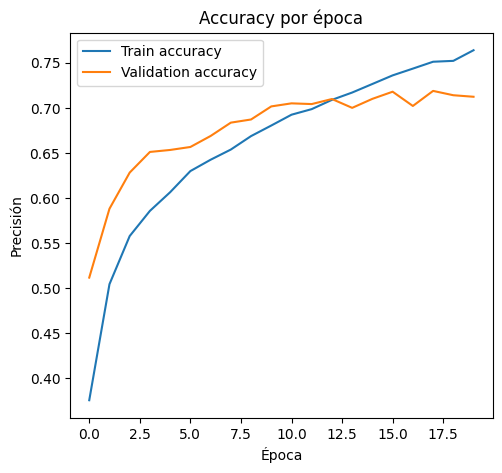

In [41]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy por época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()



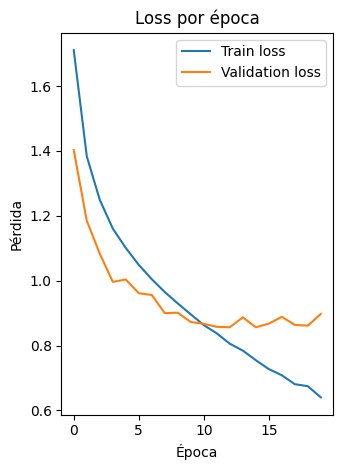

In [42]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


Las gráficas de precisión y pérdida (accuracy y loss) por época muestran un comportamiento progresivamente ascendente en la precisión, tanto sobre el conjunto de entrenamiento como sobre el de validación. El modelo alcanza una precisión de validación cercana al 71% tras 20 épocas de entrenamiento, lo cual representa una mejora significativa respecto al modelo de tipo fully connected.

Del mismo modo, la función de pérdida (loss) decrece de forma estable, sin indicios fuertes de sobreajuste, lo que sugiere que el modelo es capaz de generalizar correctamente a datos no vistos.

In [43]:
# Evaluación sobre el conjunto de test
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.7126
Test loss: 0.9004


El modelo alcanza una precisión global de test del 71.26%, con una pérdida de 0.9004. Este valor es coherente con la precisión obtenida en validación, lo cual confirma que el modelo generaliza adecuadamente.

In [44]:
# Predicciones
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [45]:
# Reporte detallado
print("\nReporte de clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=MAP_ELEMENTS.values()))


Reporte de clasificación:
              precision    recall  f1-score   support

       avion       0.75      0.78      0.76      1000
       coche       0.82      0.83      0.82      1000
         ave       0.64      0.55      0.59      1000
        gato       0.51      0.54      0.52      1000
      ciervo       0.71      0.60      0.65      1000
       perro       0.64      0.61      0.62      1000
        rana       0.83      0.74      0.78      1000
     caballo       0.67      0.82      0.74      1000
       barco       0.81      0.84      0.82      1000
      camion       0.76      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



El informe de clasificación revela una distribución heterogénea del rendimiento entre clases. Las clases que presentan mayor desempeño son:

- Camión: precisión = 0.76, recall = 0.81

- Barco: precisión = 0.81, recall = 0.84

- Coche: precisión = 0.82, recall = 0.83

- Rana: precisión = 0.83, recall = 0.74

Por el contrario, clases como gato y ave muestran un menor rendimiento, con puntuaciones F1 inferiores a 0.60. Esto puede atribuirse a la mayor variabilidad visual de dichas clases o a su similitud con otras categorías (por ejemplo, gato y perro, ave y avión).

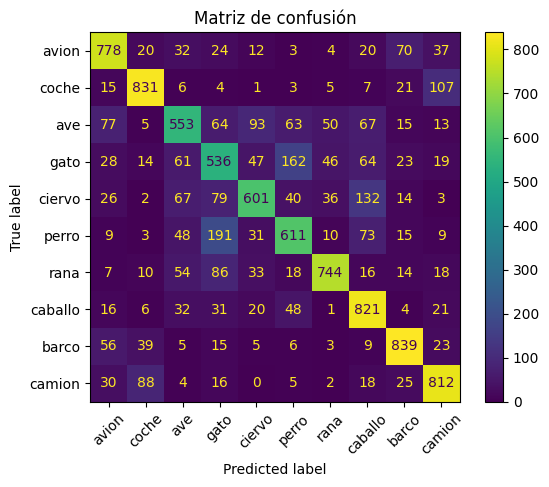

In [46]:

# Matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MAP_ELEMENTS.values())
disp.plot(xticks_rotation=45)
plt.title("Matriz de confusión")
plt.show()


La matriz de confusión proporciona una visión más granular de los errores de clasificación:

- Algunas clases, como caballo y rana, son confundidas ocasionalmente entre sí, probablemente por su apariencia similar y características compartidas.

- La clase ave presenta confusión significativa con avión, ciervo y rana, lo que sugiere que el modelo no ha logrado aprender características suficientemente discriminativas para esa categoría.

El modelo CNN básico demuestra un rendimiento competente para la tarea de clasificación en CIFAR-10, alcanzando más del 71% de precisión, lo que representa un gran avance respecto al enfoque fully connected.

# Modelo 3. CNN Profunda

Tras experimentar con arquitecturas más profundas y técnicas avanzadas, se ha obtenido un modelo convolucional con un rendimiento notablemente superior al de las versiones anteriores. Este modelo incorpora cuatro capas convolucionales, intercaladas con capas de normalización por lotes (BatchNormalization), funciones de activación ReLU, capas de pooling, y Dropout para mitigar el sobreajuste.

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [49]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [50]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization



A continuación, describo las principales características de la arquitectura:

- Conv2D(filters=32/64/128, kernel_size=(3,3), activation='relu', padding='same'):
Capas convolucionales que extraen patrones espaciales de la imagen.

- filters: número de filtros (32, 64, 128) en cada bloque, lo que permite capturar características simples a complejas.

- kernel_size=(3,3): tamaño del filtro que se desplaza sobre la imagen.

- activation='relu': función de activación no lineal que ayuda a modelar relaciones complejas.

- padding='same': mantiene las dimensiones espaciales tras la convolución.

- BatchNormalization(): normaliza las activaciones de cada mini-batch, estabilizando y acelerando el entrenamiento. Reduce el riesgo de sobreajuste y mejora la convergencia.

- MaxPooling2D(pool_size=(2,2)): reduce la dimensionalidad espacial, conservando las características más relevantes. pool_size=(2,2) toma el máximo valor de cada bloque 2×2, reduciendo así la resolución de la imagen a la mitad en cada dimensión.

- Dropout (rate=0.25/0.3/0.5): técnica de regularización que desactiva aleatoriamente un porcentaje de neuronas durante el entrenamiento para evitar el sobreajuste.

- Flatten(): convierte las salidas 2D de las capas convolucionales en un vector 1D para poder ser procesado por capas densas.

- Dense(units=256, activation='relu'): capa totalmente conectada (fully connected) que permite integrar todas las características extraídas para realizar la clasificación.

- Dense(units=10, activation='softmax') : capa de salida para clasificación multiclase con 10 neuronas (una por cada clase del dataset CIFAR-10).

- softmax: convierte los valores de salida en probabilidades normalizadas entre 0 y 1.

In [52]:
# Arquitectura de la red
cnn_model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [53]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [54]:
cnn_history = cnn_model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=64),
                            epochs=20,
                            validation_data=(x_valid, y_valid_one_hot),
                            steps_per_epoch=x_train.shape[0] // 64)


Epoch 1/20


C:\Users\Pedro\anaconda3\envs\rn_act1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 219ms/step - accuracy: 0.3241 - loss: 2.1623 - val_accuracy: 0.4620 - val_loss: 1.5251
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 218ms/step - accuracy: 0.5310 - loss: 1.3195 - val_accuracy: 0.5437 - val_loss: 1.3829
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 220ms/step - accuracy: 0.6143 - loss: 1.0855 - val_accuracy: 0.6413 - val_loss: 1.0590
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 224ms/step - accuracy: 0.6662 - loss: 0.9605 - val_accuracy: 0.7166 - val_loss: 0.8108
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 220ms/step - accuracy: 0.6898 - loss: 0.8850 - val_accuracy: 0.6831 - val_loss: 0.9260
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 227ms/step - accuracy: 0.7036 - loss: 0.8396 - val_accuracy: 0.7031 - val_loss: 0.9190
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 226ms/step - accuracy: 0.7257 - loss: 0.7953 - val_accuracy: 0.7603 - val_loss: 0.7137
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.7366 - loss: 0.75

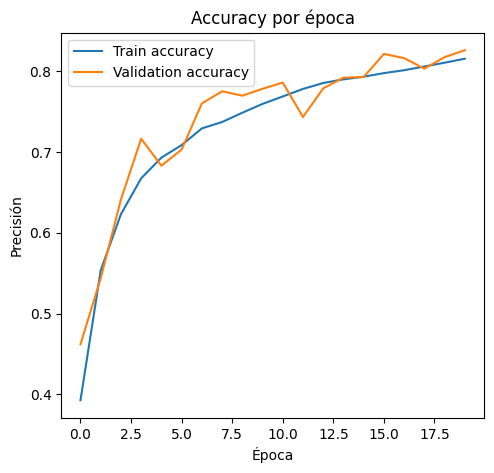

In [59]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy por época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()


En esta gráfica se observa cómo la precisión sobre los datos de entrenamiento y validación mejora de forma progresiva con el número de épocas. La precisión de validación alcanza y supera ligeramente el 80% a partir de la época 14, estabilizándose a partir de la época 17. El hecho de que ambas curvas estén cercanas y no se separen significativamente indica que el modelo no presenta signos graves de sobreajuste (overfitting).

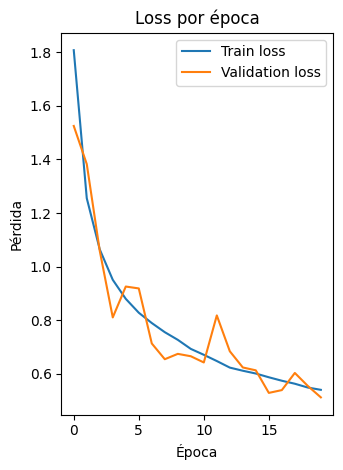

In [60]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


La pérdida del modelo disminuye de forma clara tanto para entrenamiento como validación, indicando un aprendizaje estable. Se aprecia una convergencia gradual y suave, lo que sugiere un buen ajuste del optimizador y la arquitectura. La cercanía entre ambas curvas refuerza la idea de un entrenamiento equilibrado y generalización adecuada.

In [61]:
# Evaluación sobre el conjunto de test
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Test accuracy (CNN mejorado): {cnn_test_acc:.4f}")
print(f"Test loss (CNN mejorado): {cnn_test_loss:.4f}")


Test accuracy (CNN mejorado): 0.8226
Test loss (CNN mejorado): 0.5374


El modelo alcanza una precisión del 82.26% sobre el conjunto de test, lo cual representa una mejora sustancial respecto a los modelos anteriores. La pérdida en test se mantiene en valores bajos, reforzando la calidad de las predicciones.

In [62]:
# Predicciones
cnn_y_pred = cnn_model.predict(x_test)
cnn_y_pred_classes = np.argmax(cnn_y_pred, axis=1)
cnn_y_true_classes = np.argmax(y_test_one_hot, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step


In [63]:
# Reporte de clasificación
print("Reporte de clasificación - CNN mejorado")
print(classification_report(cnn_y_true_classes, cnn_y_pred_classes, target_names=MAP_ELEMENTS.values()))


Reporte de clasificación - CNN mejorado
              precision    recall  f1-score   support

       avion       0.84      0.86      0.85      1000
       coche       0.87      0.94      0.90      1000
         ave       0.82      0.74      0.78      1000
        gato       0.79      0.56      0.65      1000
      ciervo       0.79      0.82      0.81      1000
       perro       0.88      0.63      0.73      1000
        rana       0.75      0.93      0.83      1000
     caballo       0.78      0.91      0.84      1000
       barco       0.91      0.91      0.91      1000
      camion       0.82      0.93      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



El análisis por clase revela un rendimiento notablemente uniforme. Las clases coche, camión y caballo son las mejor clasificadas (f1-score ≥ 0.87), mientras que las más complejas como gato y perro presentan f1-score más bajos (en torno a 0.65). Esto parece deberse a los motivos antes mencionados.

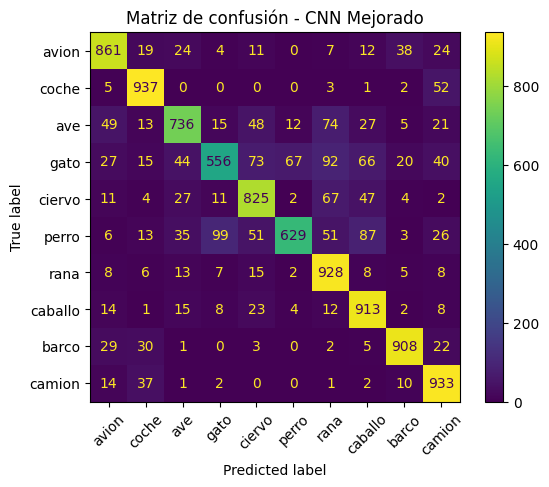

In [64]:
# Matriz de confusión
cm_cnn = confusion_matrix(cnn_y_true_classes, cnn_y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=MAP_ELEMENTS.values())
disp.plot(xticks_rotation=45)
plt.title("Matriz de confusión - CNN Mejorado")
plt.show()


La matriz de confusión permite identificar patrones de error. Las diagonales dominantes muestran que la mayoría de las imágenes son correctamente clasificadas. Sin embargo, aún existen confusiones frecuentes entre clases visualmente similares como gato y perro, ave y avión, o barco y camión. Estos errores son esperables dado que CIFAR-10 contiene imágenes pequeñas y de baja resolución.